# Introduction

Customer churn—when a user or subscriber stops using a product or service—represents a critical metric for many businesses. High churn rates can lead to substantial revenue losses, while effectively retaining customers often proves far more cost-effective than acquiring new ones. This project aims to **predict customer churn** using a supervised machine learning approach, enabling data-driven decisions to reduce turnover and improve customer satisfaction.

## Why Churn Prediction Matters
1. **Revenue Impact**  
   Retaining existing customers is generally more profitable than constantly acquiring new ones.  
2. **Proactive Retention**  
   Early identification of customers at high risk of churning allows for timely interventions such as targeted offers or improved customer service.  
3. **Resource Allocation**  
   Understanding why customers churn informs strategic investments in product features, marketing, or support initiatives.

## Project Objectives
1. **Perform Exploratory Data Analysis (EDA)**  
   Investigate the dataset to understand patterns, distributions, and potential data quality issues.
2. **Build a Predictive Model**  
   Use historical customer data to train a machine learning model that classifies whether a customer is likely to churn.  
3. **Evaluate Model Performance**  
   Compare multiple algorithms (e.g., Logistic Regression, Random Forest, Gradient Boosted Trees) with relevant metrics like accuracy, precision, recall, ROC-AUC, and F1 score.  
4. **Interpret Key Factors**  
   Identify which features (e.g., contract type, monthly charges) most influence churn predictions.  
5. **Provide Business Insights**  
   Present actionable recommendations for reducing churn based on model findings.

## Project Workflow
1. **Data Exploration & Cleaning**  
   Investigate missing values, outliers, and data distribution.  
2. **Feature Engineering**  
   Create or transform features to improve predictive power.  
3. **Model Training, Validation & Evaluation**  
   Select and tune multiple machine learning models, employing cross-validation. Assess model performance using the chosen metrics. 
4. **Model Interpretation & Recommendations**  
   Interpret results to guide decision-making and summarize key insights and propose strategies to reduce churn (e.g., targeted offers, contract adjustments, or customer support improvements).

By the end of this notebook, you should have a clear understanding of the features driving churn and actionable insights to retain customers more effectively.




In [1]:
#Import Libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (
    accuracy_score, 
    recall_score, 
    precision_score, 
    f1_score, 
    roc_auc_score,
    make_scorer
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from joblib import parallel_backend

#Set Parameters
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

### 1. Data Exploration and Cleaning

In [2]:
df = pd.read_csv(os.path.join(os.getcwd(), "..", "Telco Customer Data", "Telco_Customer_DataSet_12202024.csv"))
print(df.head(10))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype('float64') # Some early feature engineering
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
print(df['SeniorCitizen'].value_counts())

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


In [7]:
df = df.dropna(subset=['TotalCharges']) 
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str) # Some early feature engineering
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x == "1" else 'No') # Some early feature engineering
df = df.drop(columns=['customerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [8]:
print(df['SeniorCitizen'].unique())

['No' 'Yes']


As part of the cleaning process: 

1. I saw that most of the features have non-null values which is great. 
2. Total Charges was type "object". When trying to change it to float, I realized there were blank values in the field. After reviewing the rows which had blank values, I decided to drop those rows as they likely would not affect the predictive power of out models too much. I then converted the field to type float as needed.
3. SeniorCitizen was a categorical field listed as a numeric field. I converted the field to have "Yes" and "No" data categories instead of 1 and 0. 
4. I dropped the column "CustomerID" as it is a high cardinality categorical field which will have no predictive power.
    
The data is cleaned up now and ready for analysis.    

Lets Analyze the Categorical Data

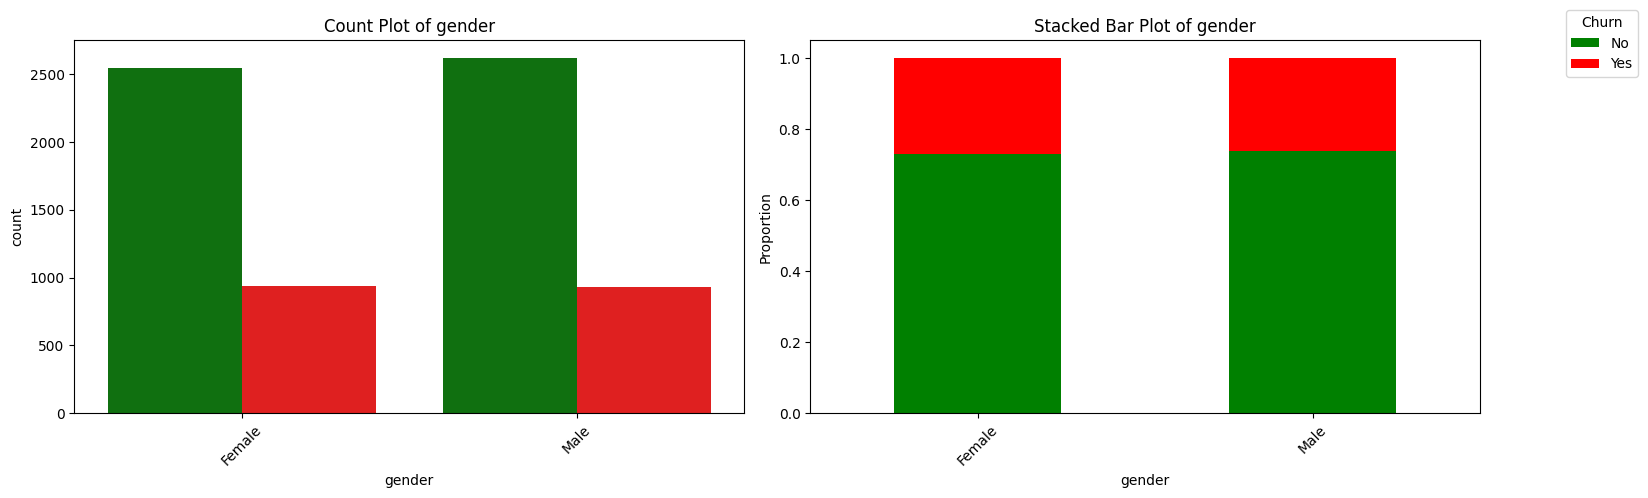

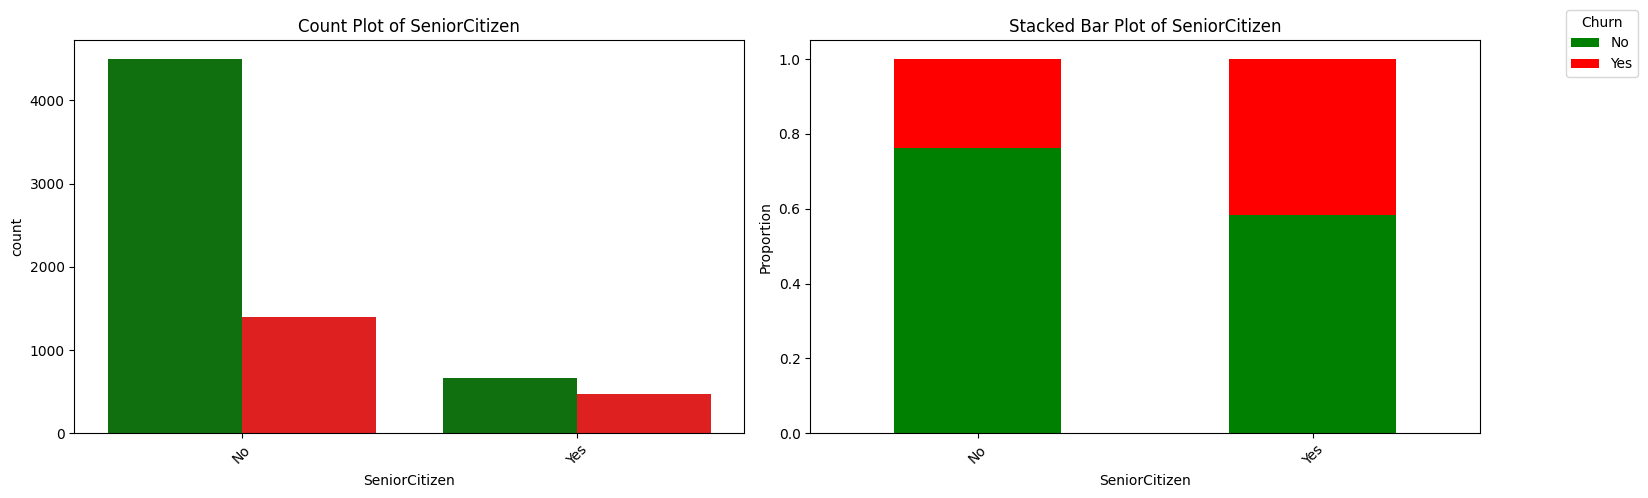

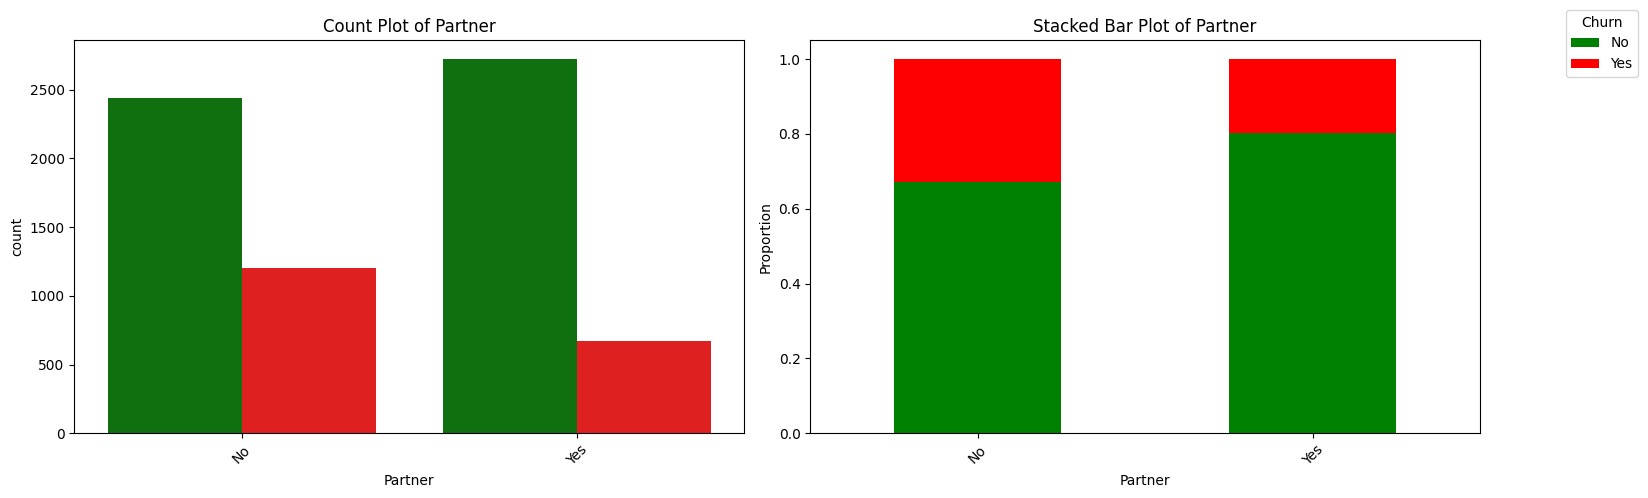

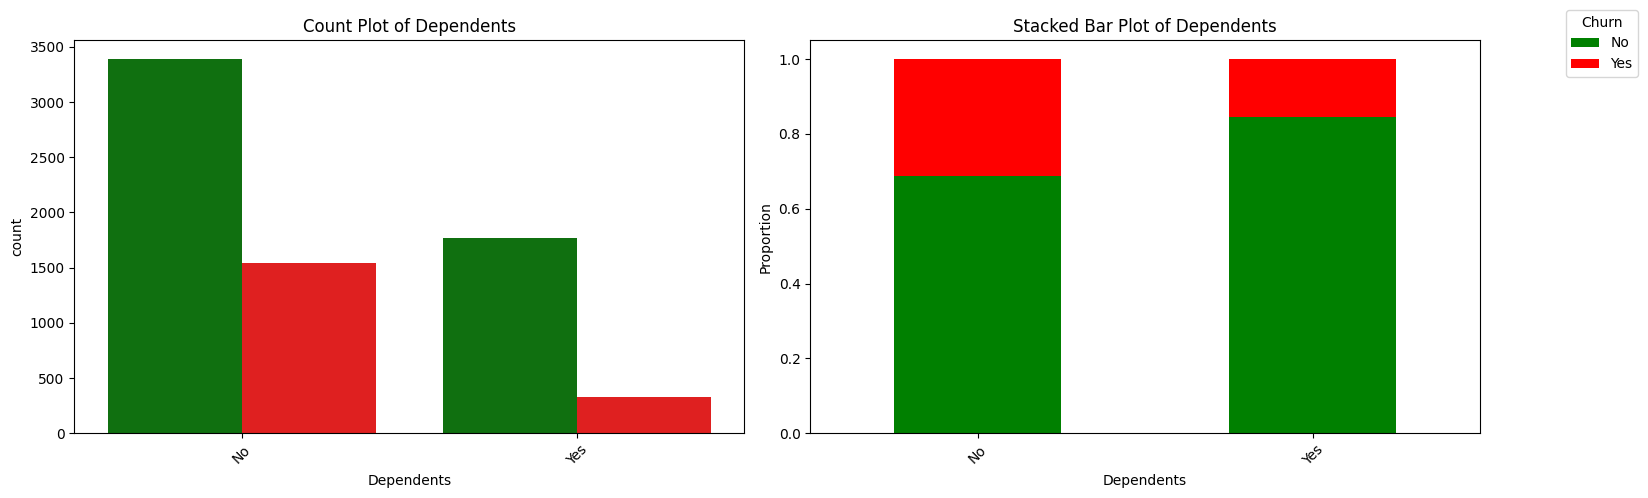

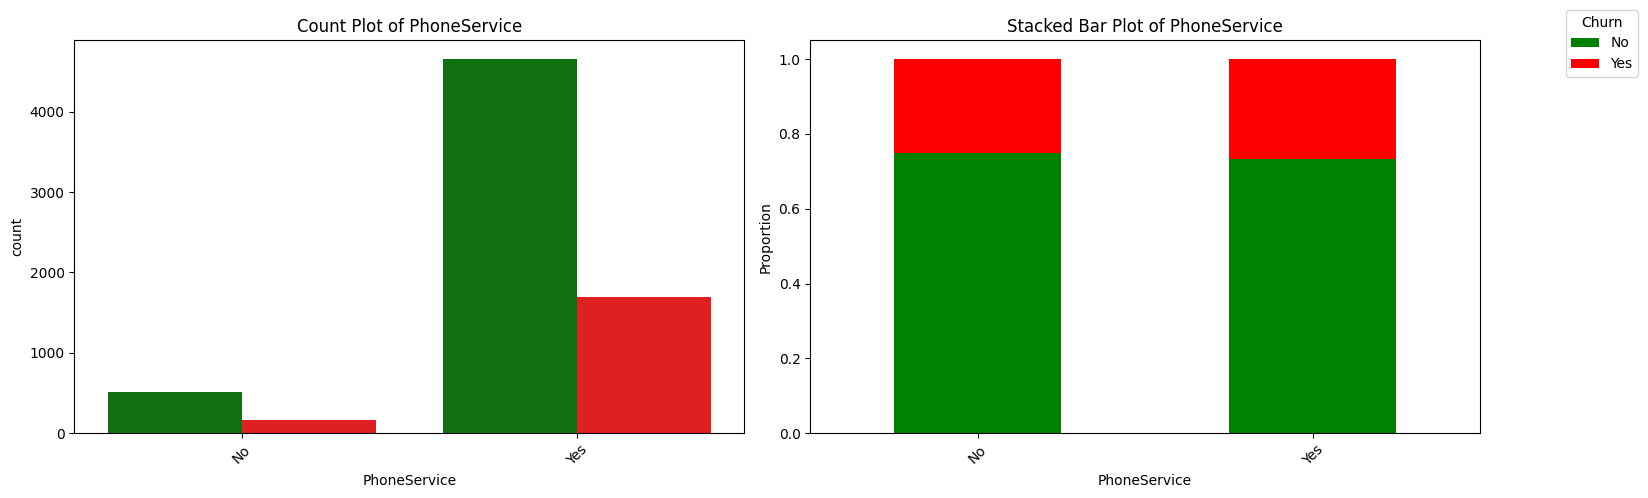

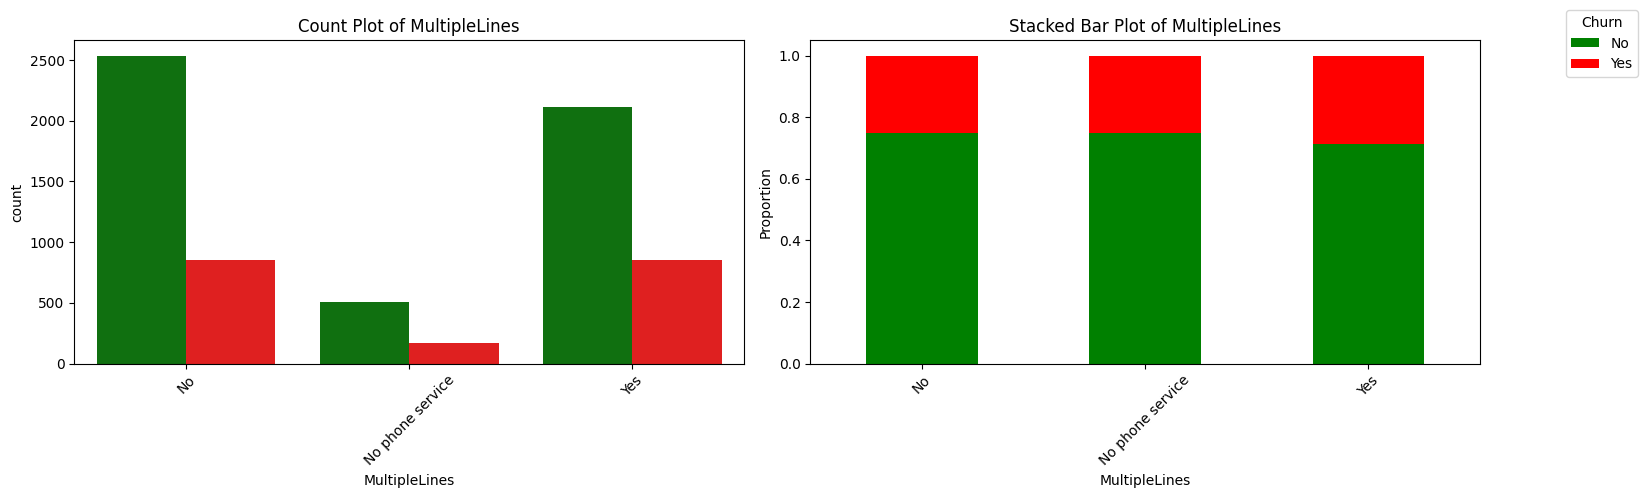

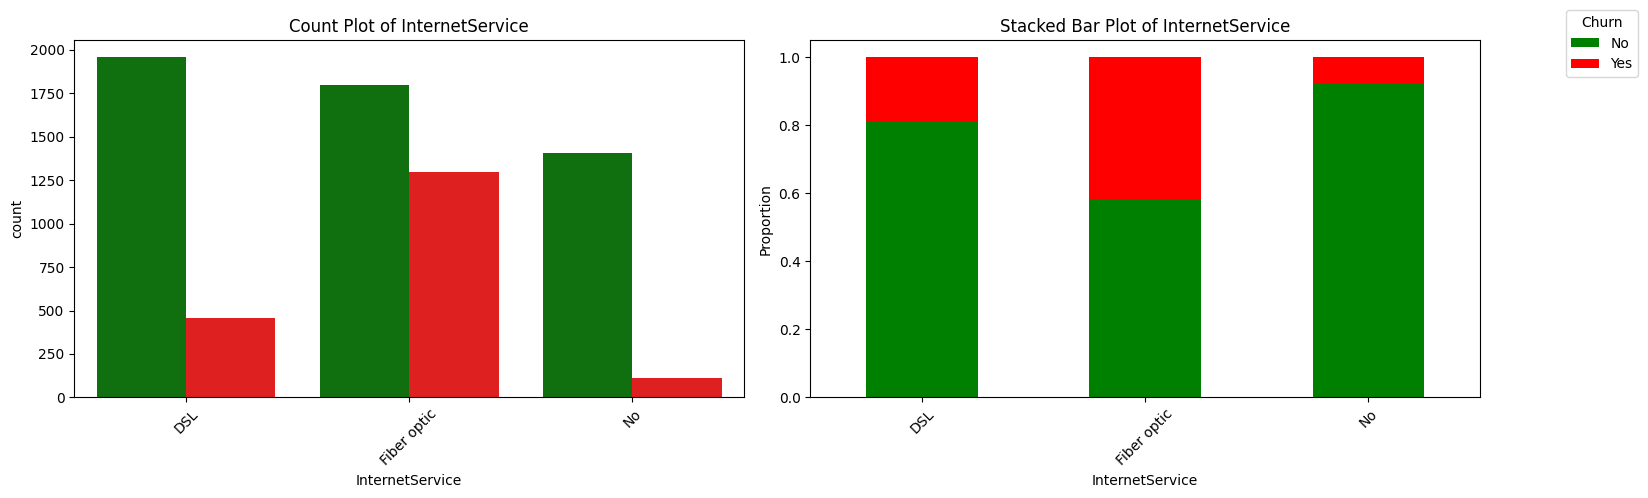

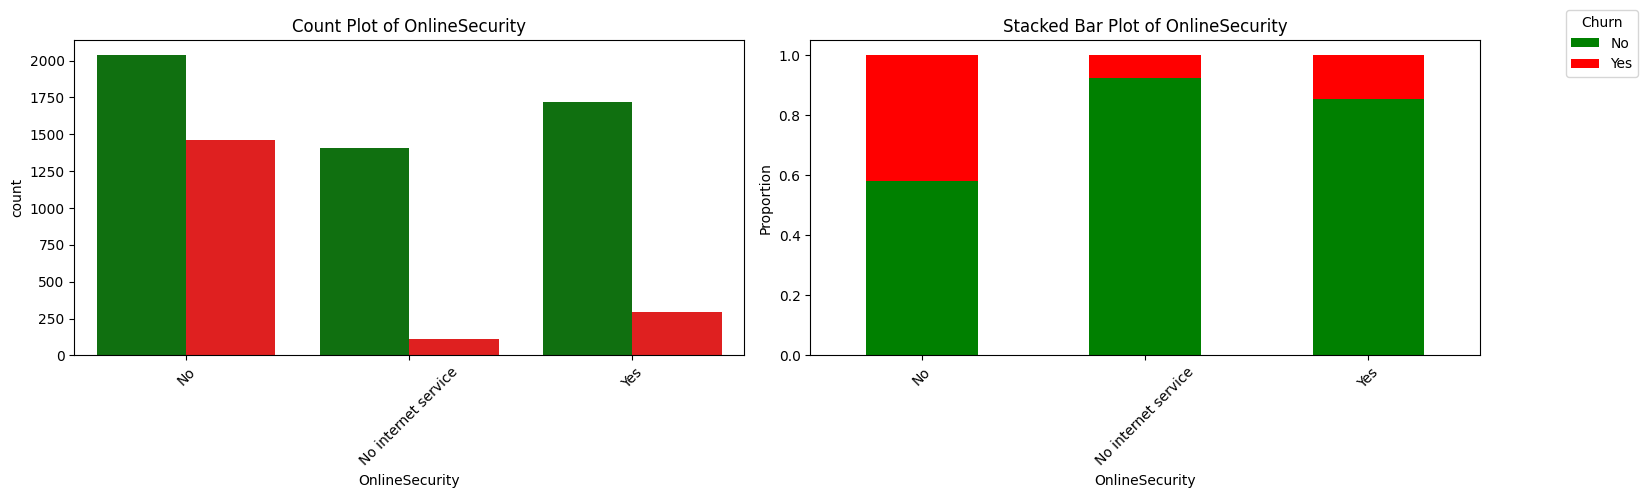

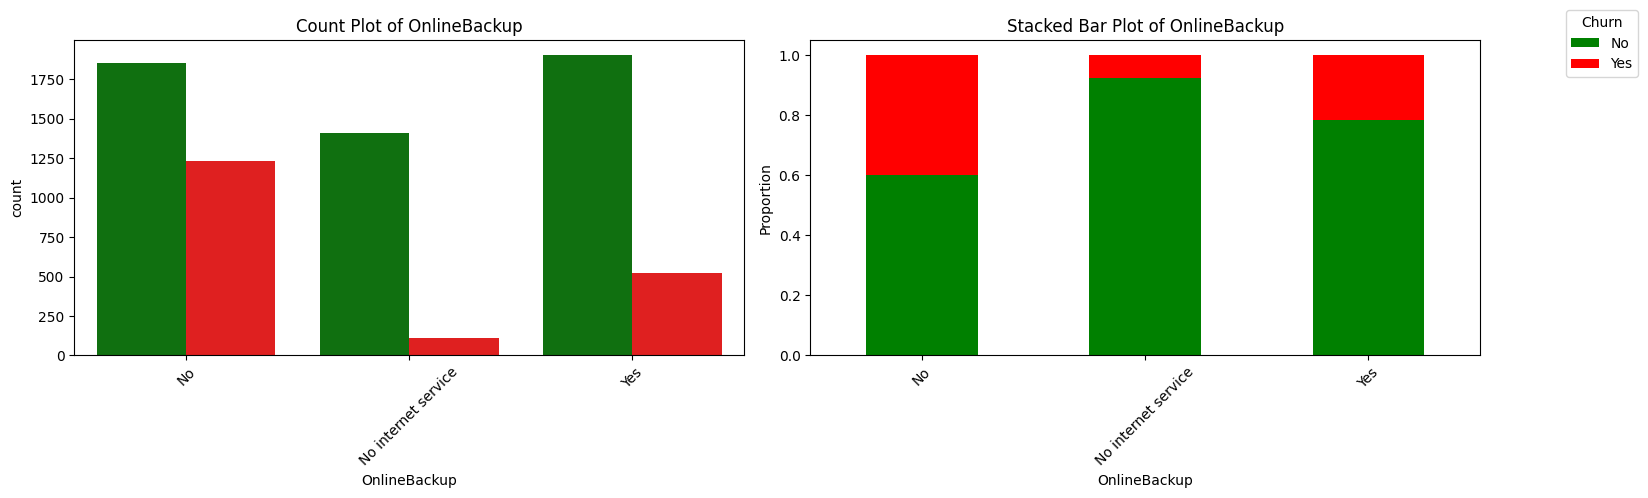

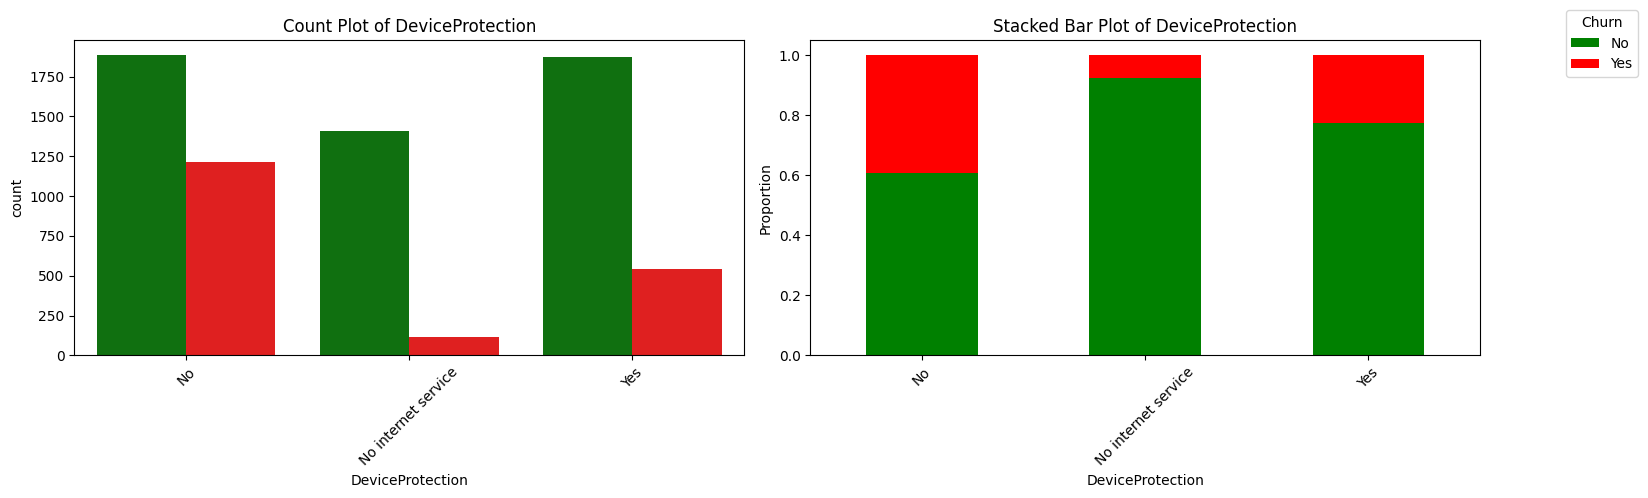

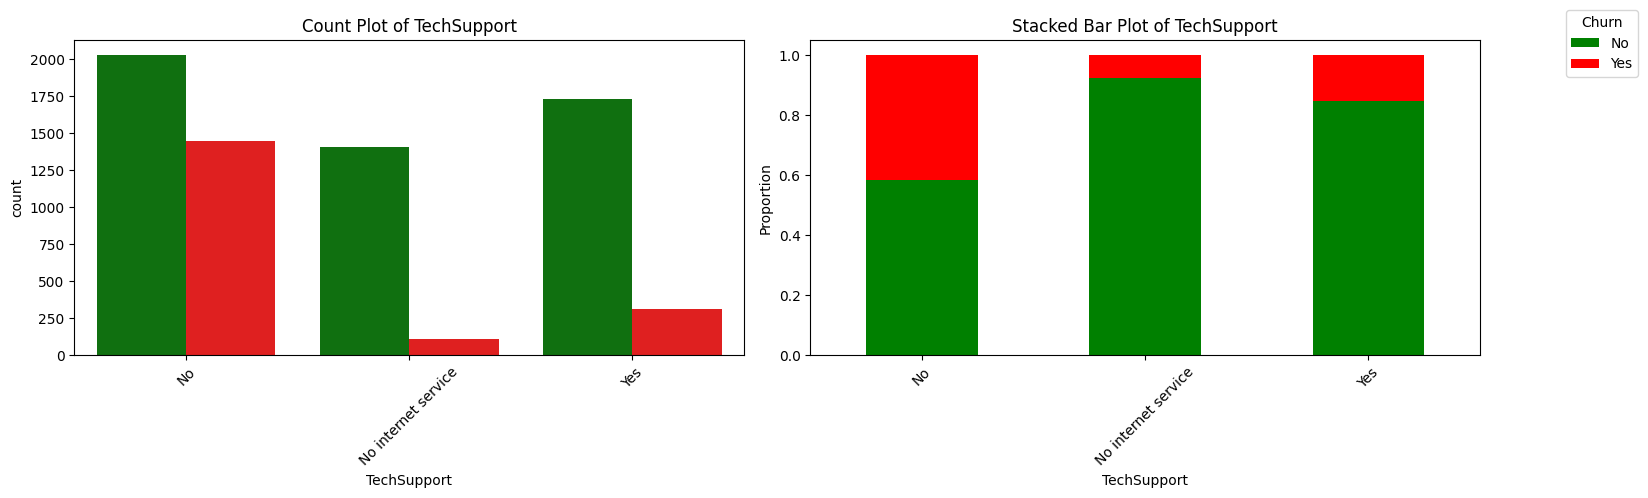

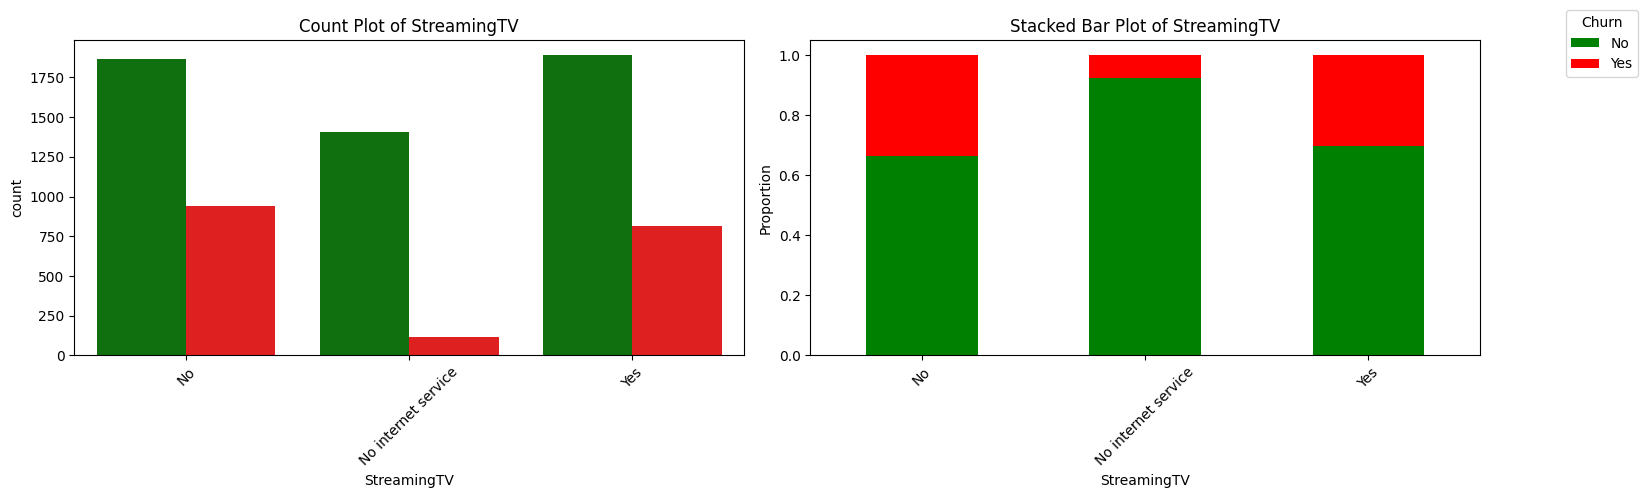

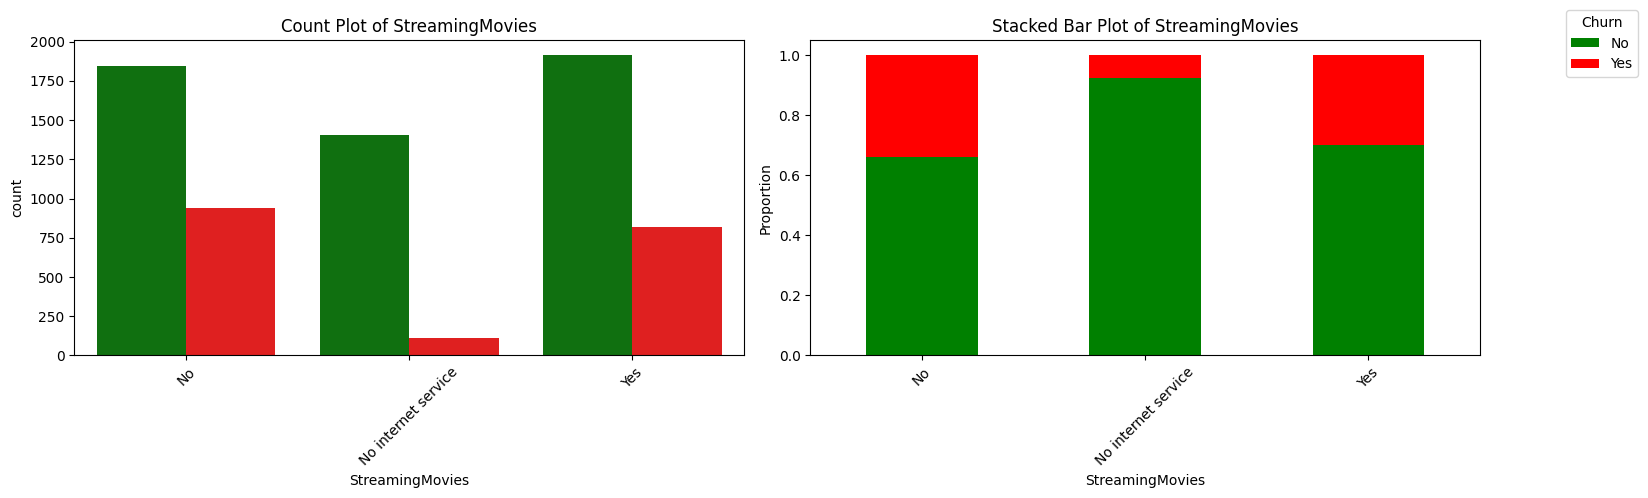

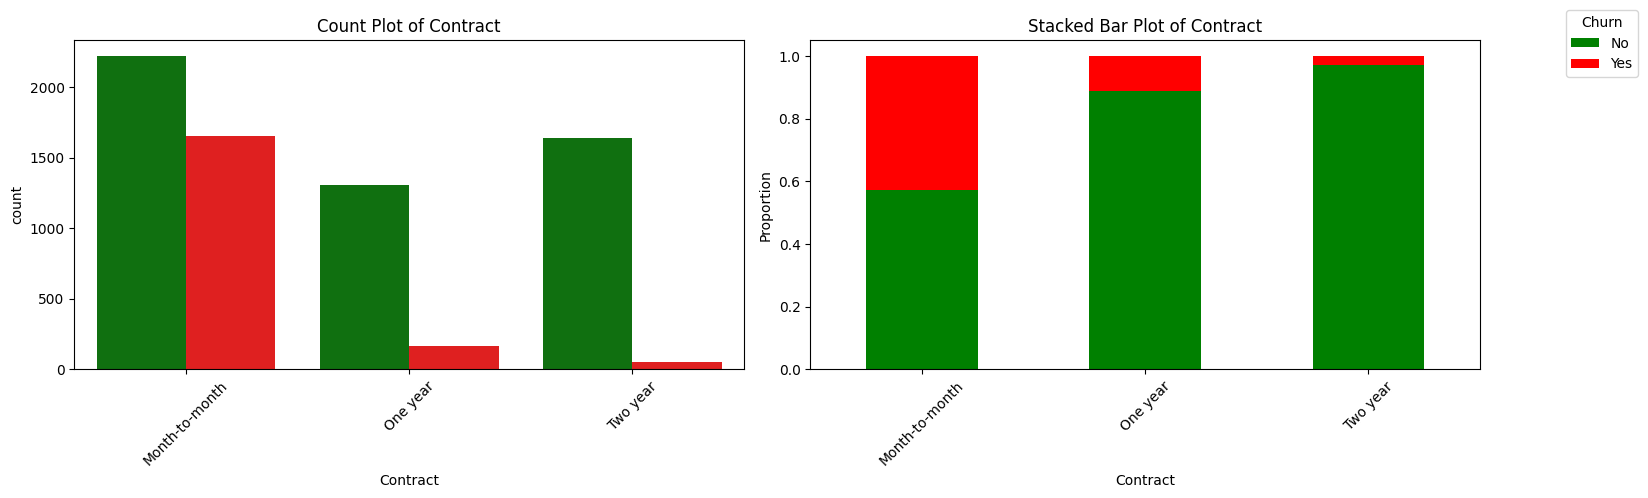

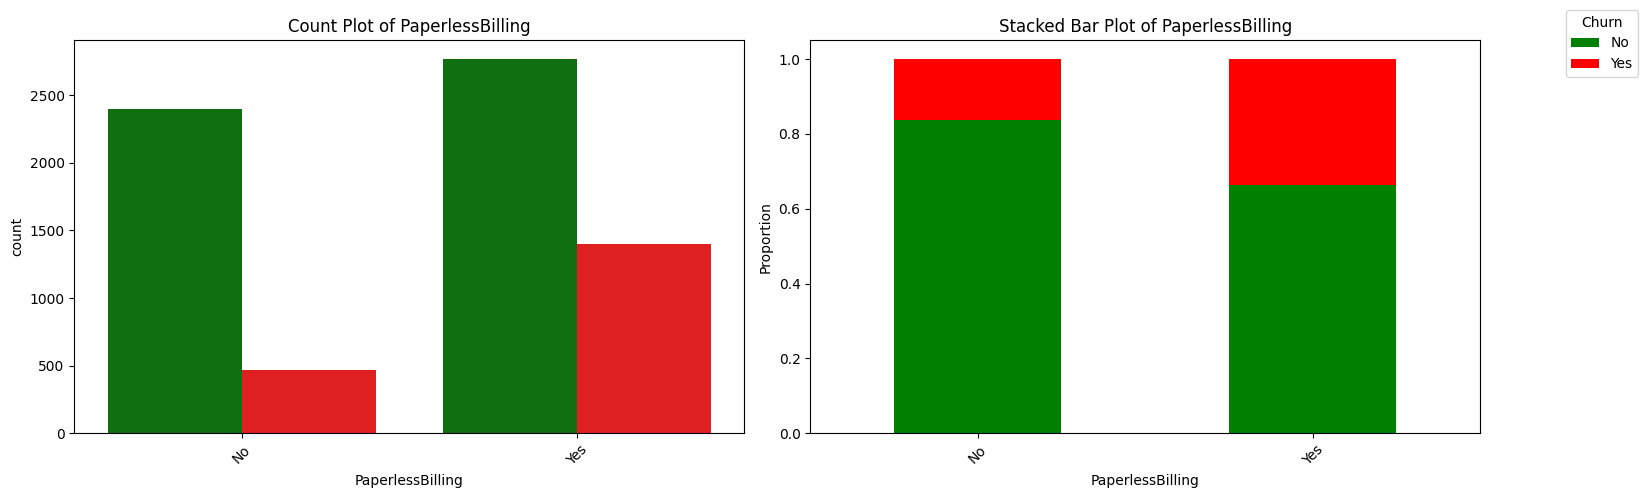

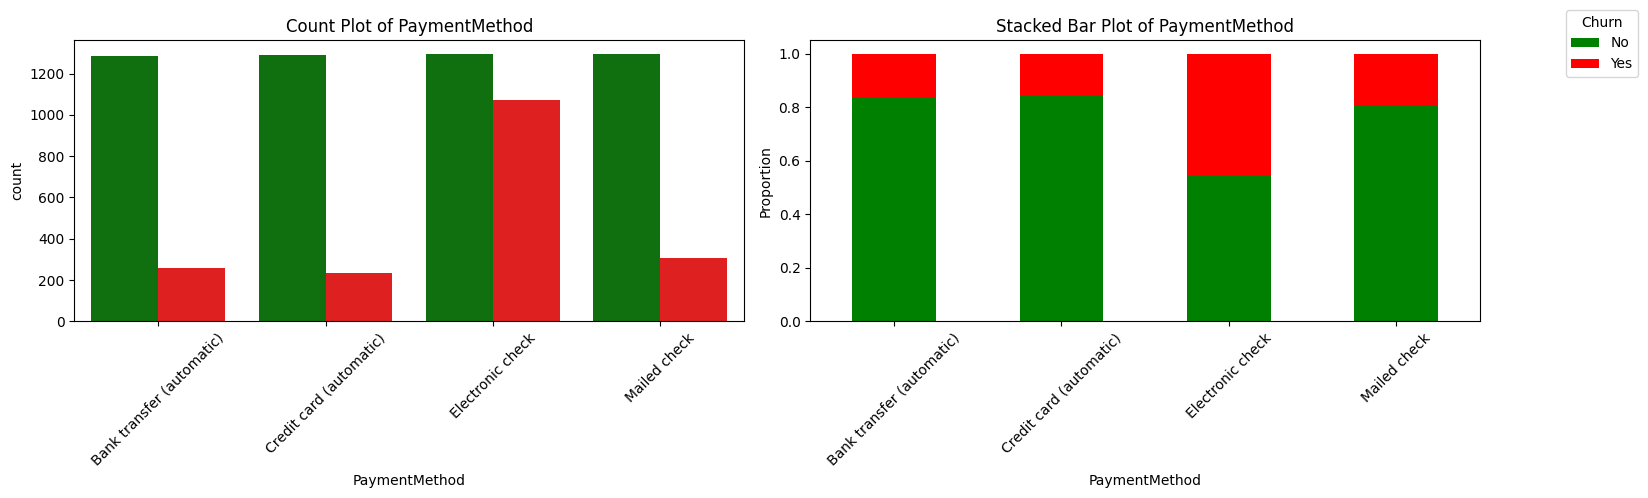

In [9]:
# Define colors for Yes and No
colors = {'Yes': 'red', 'No': 'green'}

# Add missing keys for 0 and 1 in the palette
palette = {0: 'green', 1: 'red'}

predictors = df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure']).columns

for predictor in predictors:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Get sorted unique values for consistent ordering
    sorted_values = sorted(df[predictor].unique())
    
    # Count plot
    sns.countplot(data=df, x=predictor, hue='Churn', palette=colors, ax=axes[0], order=sorted_values)
    axes[0].set_title(f'Count Plot of {predictor}')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Stacked bar plot
    crosstab = pd.crosstab(df[predictor], df['Churn'])
    crosstab = crosstab.reindex(sorted_values)  # Reindex to ensure consistent order
    crosstab.div(crosstab.sum(1), axis=0).plot(kind='bar', stacked=True, color=['green', 'red'], ax=axes[1])
    axes[1].set_title(f'Stacked Bar Plot of {predictor}')
    axes[1].set_xlabel(predictor)
    axes[1].set_ylabel('Proportion')
    axes[1].tick_params(axis='x', rotation=45)
    
    # Move legend to the top right outside the plots
    handles, labels = axes[1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1), title='Churn')
    axes[1].get_legend().remove() 
    axes[0].get_legend().remove() 
     # Remove the legend from the axes
    
    plt.tight_layout()
    plt.show()

Observations about the Categorical Features:

1. Churn rate does not differ significantly between genders.
2. There are fewer customers who are senior citizens. However among senior citizens there is a greater churn rate as compared to non senior citizens.
3. People without partners tend to have a greater churn rate than people with partners.
4. People with no dependants tend to have a greater churn rate than people with dependants.
5. A large proportion of customers have phone service.
6. Churn rate amount people who have Fiber Optic Internet service seem to have a much greater churn rate than people with DSL or those without internet service. This could possibly be an indicator of a poor level of service being provided.
7. Customers with no OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport tend to have a greater churn rate. This indicates that customers who felt secure and could connect with people about their problems tend to churn less. This could possibly be a way to look decrease churn rate by offering combined products at a lower price to maintain customer.
8. Customers with StreamingTV and StreamingMovies tended to churn less.
9. There seems to be some signal that paperless billing seemed to lead to higher churn rate. The same can be said about payment method where electronic checking is involved. 
10. People with month to month subscription services tend to churn at a greater rate.     

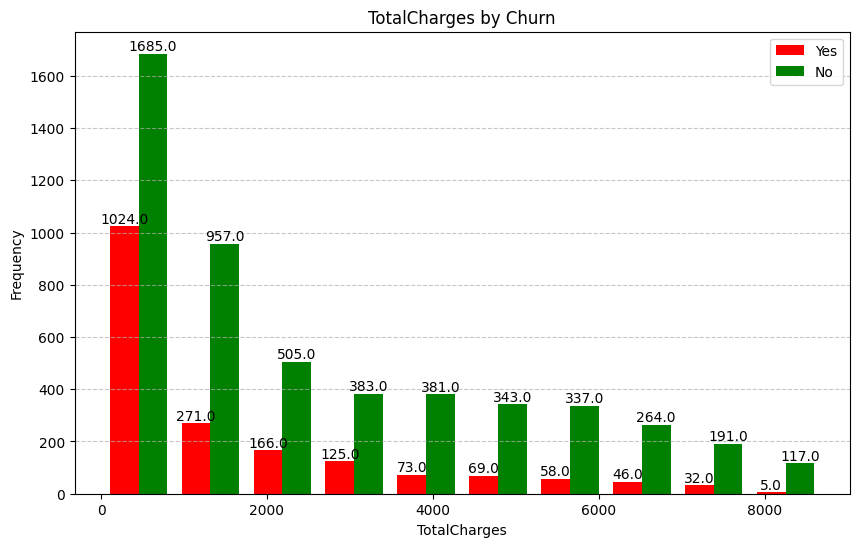

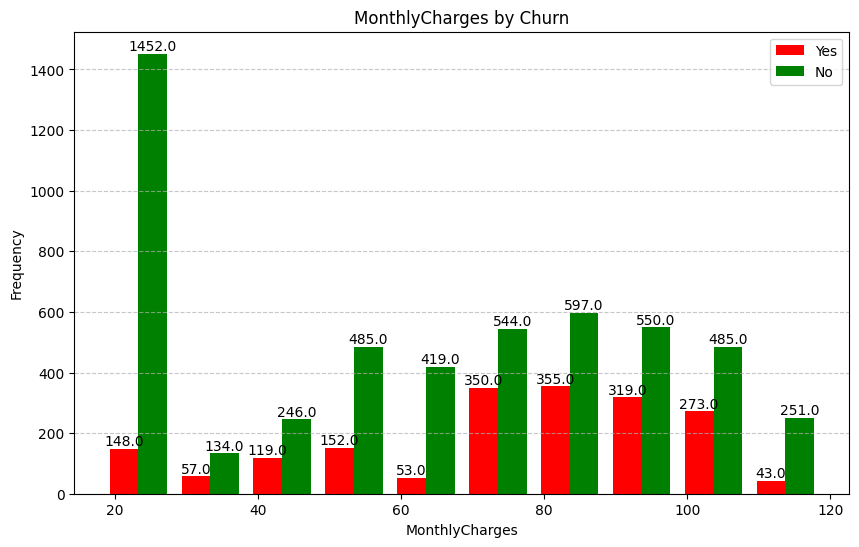

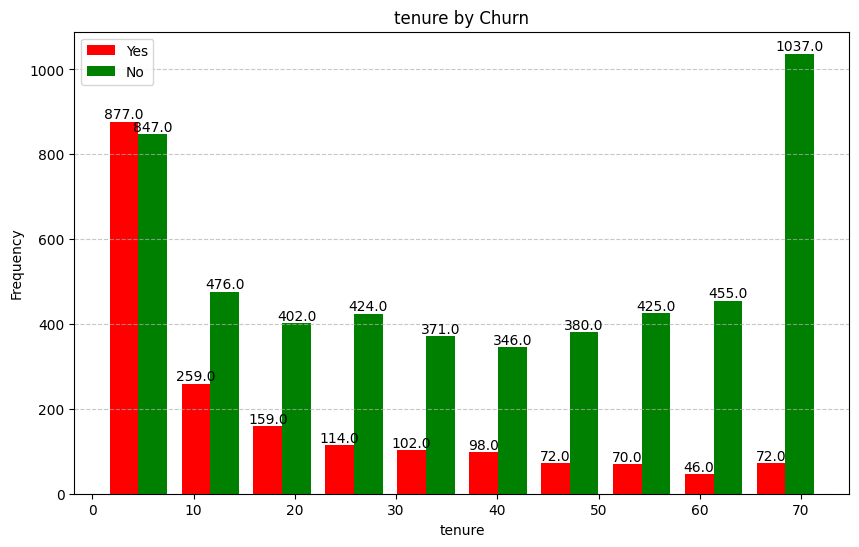

In [10]:
num_feature = ['TotalCharges', 'MonthlyCharges', 'tenure']

for nf in num_feature:
# make plot for num_feature
    churned = df[df['Churn'] == 'Yes']
    not_churned = df[df['Churn'] == 'No']

# Plotting
    plt.figure(figsize=(10, 6))
    plt.hist([churned[nf], not_churned[nf]], bins=10, color=['red', 'green'], label=['Yes', 'No'])
    plt.title(f'{nf} by Churn')
    plt.xlabel(f'{nf}')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
    for rect in plt.gca().patches:
        height = rect.get_height()
        plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

Observations about the numerical features:

1. People with lower tenure tend to churn at a higher rate.
2. As expected, higher monthly costs tend to lead to higher churn rates. 

### 2. Feature Engineering and Feature Selection

In [11]:
cat_cols = [col for col in df.columns if (df[col].dtype == 'object') & (col != 'Churn')]
num_cols = [col for col in df.columns if col not in cat_cols + ['Churn']]
print(cat_cols)
print(num_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['tenure', 'MonthlyCharges', 'TotalCharges']


In [12]:
X = df.drop('Churn', axis=1)
y = df['Churn'].apply(lambda x: '1' if x == "Yes" else '0')
y = y.astype(int) 

In [13]:
#Train_Test_Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [14]:
#Use Variance Inflation Factor to check for multicollinearity
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False,)
    return(vif)

In [15]:
# One Hot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder.fit(X_train[cat_cols])

X_train_cat_ohe = encoder.transform(X_train[cat_cols])
X_test_cat_ohe  = encoder.transform(X_test[cat_cols])
cat_ohe_cols    = encoder.get_feature_names_out(cat_cols)

X_train_ohe = pd.concat([
    X_train[num_cols].reset_index(drop=True),
    pd.DataFrame(X_train_cat_ohe, columns=cat_ohe_cols)
], axis=1)

X_test_ohe = pd.concat([
    X_test[num_cols].reset_index(drop=True),
    pd.DataFrame(X_test_cat_ohe, columns=cat_ohe_cols)
], axis=1)

#After One Hot Encoding check for multicollinearity
checkVIF(X_train_ohe).reset_index(drop=True)

c:\Users\Daniy\Telco Customer Churn Prediction\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,DeviceProtection_No internet service,inf
1,OnlineBackup_No internet service,inf
2,StreamingMovies_No internet service,inf
3,TechSupport_No internet service,inf
4,StreamingTV_No internet service,inf
5,OnlineSecurity_No internet service,inf
6,InternetService_No,inf
7,PhoneService_Yes,1775.33
8,MonthlyCharges,870.24
9,InternetService_Fiber optic,149.28


In [16]:
vif_df = checkVIF(X_train_ohe).reset_index(drop=True)
feature_list = [feature for feature, vif in zip(vif_df['Features'], vif_df['VIF']) if vif != float('inf')]
X_train_ohe = X_train_ohe[feature_list + ['InternetService_No']]
X_test_ohe = X_test_ohe[feature_list + ['InternetService_No']]

c:\Users\Daniy\Telco Customer Churn Prediction\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


After looking at the VIF, I decided to remove one hot encoded features where no internet service was part of the cardinality of the features. These had infinite colliniarity which is likely also because of the way we are one hot encoding. I have decided to keep a lot of the feature were there is significant colliniarity(VIF > 10) as I believe those features do have predictive power that will provide needed signal to the models. 

In [17]:
#After removing multicollinear features check for multicollinearity
checkVIF(X_train_ohe).reset_index(drop=True)

,Features,VIF
0,PhoneService_Yes,1775.33
1,MonthlyCharges,870.24
2,InternetService_Fiber optic,149.28
3,InternetService_No,104.13
4,MultipleLines_No phone service,60.92
5,StreamingMovies_Yes,24.30
6,StreamingTV_Yes,24.26
7,TotalCharges,10.83
8,tenure,7.54
9,MultipleLines_Yes,7.30


### 3. Model Training, Validation & Evaluation

In [18]:
#Custom Scorer for GridSearchCV
scoring_metric = 'f1'  # or 'recall', 'precision', 'accuracy', etc.
my_scorer = make_scorer(recall_score, zero_division=0)

In [19]:
# Parameter Grids for GridSearchCV Model Evaluation
# Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1.0, 10.0],            
    'penalty': ['l1', 'l2'],               
    'class_weight': ['balanced'] 
}

# Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# XGBoost & LightGBM
pos_count = y_train.sum()
neg_count = len(y_train) - pos_count
scale_pos_weight_val = (neg_count / pos_count) if pos_count else 1

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [scale_pos_weight_val*0.8, scale_pos_weight_val, scale_pos_weight_val*1.2]
}

# LightGBM
param_grid_lgb = {
    'n_estimators': [100, 200],
    'max_depth': [-1, 5],     
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 63],
    'scale_pos_weight': [scale_pos_weight_val]
}


In [20]:
# Models to evaluate

models = [
    (
        'LogisticRegression',
        LogisticRegression(
            solver='liblinear',
            random_state=42,
            class_weight='balanced'
        ),
        param_grid_lr
    ),
    (
        'RandomForest',
        RandomForestClassifier(
            random_state=42,
            class_weight='balanced'
        ),
        param_grid_rf
    ),
    (
        'XGBoost',
        xgb.XGBClassifier(
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42,
            scale_pos_weight=scale_pos_weight_val
        ),
        param_grid_xgb
    ),
    (
        'LightGBM',
        lgb.LGBMClassifier(
            random_state=42,
            scale_pos_weight=scale_pos_weight_val
        ),
        param_grid_lgb
    )
]

In [21]:
# Perform GridSearchCV for each model, store best results

from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

results = []

for model_name, model_obj, param_grid in models:
    print(f"\n=== Tuning {model_name} ===")
    grid_search = GridSearchCV(
        estimator=model_obj,
        param_grid=param_grid,
        scoring=my_scorer,         
        cv=cv,
        n_jobs=-1,
        verbose=1
    )
    
    # Fit on the training data
    with parallel_backend('threading'):
        grid_search.fit(X_train_ohe, y_train)
    
    # Best estimator and parameters
    best_model = grid_search.best_estimator_
    print(f"Best Params: {grid_search.best_params_}")
    
    # Evaluate on the test set at default threshold=0.5
    probs_test = best_model.predict_proba(X_test_ohe)[:, 1]
    preds_test = best_model.predict(X_test_ohe)
    
    acc = accuracy_score(y_test, preds_test)
    prec = precision_score(y_test, preds_test, zero_division=0)
    rec = recall_score(y_test, preds_test, zero_division=0)
    f1 = f1_score(y_test, preds_test, zero_division=0)
    roc = roc_auc_score(y_test, probs_test)
    
    model_result = {
        'Model': model_name,
        'Best_Params': grid_search.best_params_,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1,
        'ROC_AUC': roc
    }
    results.append(model_result)

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
print("\n=== Final Tuned Results ===")
#print(results_df.sort_values(by='F1', ascending=False))
print(results_df)


=== Tuning LogisticRegression ===
Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\Daniy\Telco Customer Churn Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 24.
  warnings.warn(


Best Params: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l1'}

=== Tuning RandomForest ===
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Params: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

=== Tuning XGBoost ===
Fitting 3 folds for each of 729 candidates, totalling 2187 fits


c:\Users\Daniy\Telco Customer Churn Prediction\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:07:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 3.31505016722408, 'subsample': 1.0}

=== Tuning LightGBM ===
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

Summary of Section:
1.  We have trained, cross validated and then evaluated our chosen models. 
2.  We used recall as a way to pick our best models during cross validation.
3.  We then evaluated our best models on the test data.

### 4. Model Interpretation and Recommendations

1. **Decision to Use Recall as the Main Metric**
   
   This decision is based on business considerations. Below are the factors to consider for each metric:<br>
        a. **Recall**: Maximizes retention; prevents revenue loss by identifying most churners.<br>
        b. **Precision**: Optimizes resource allocation; ensures financial efficiency by targeting only true churners.<br>
        c. **F1 Score**: Balances Recall and Precision; represents the harmonic mean of precision and recall.<br>
        d. **ROC-AUC**: With precision and recall, we can fine-tune the threshold. Here, we are keeping a stable threshold, but if we want a metric that is threshold-independent, we could consider using this metric or use it in conjunction with other metrics.<br>

2. **Review of Insights from Exploratory Data Analysis (EDA)**

   It is recommended that business stakeholders review the following summarized insights from our EDA:<br>
        a. **Gender**: Churn rate does not differ significantly between genders.<br>
        b. **Senior Citizens**: There are fewer customers who are senior citizens. However, among senior citizens, there is a greater churn rate compared to non-senior citizens.<br>
        c. **Partner Status**: People without partners tend to have a greater churn rate than people with partners.<br>
        d. **Dependents**: People with no dependents tend to have a greater churn rate than people with dependents.<br>
        e. **Phone Service**: A large proportion of customers have phone service.<br>
        f. **Internet Service**: Churn rate among people who have Fiber Optic Internet service seems to be much greater than for people with DSL or those without internet service. This could possibly indicate a poor level of service being provided.<br>
        g. **Additional Services**: Customers with no Online Security, Online Backup, Device Protection, and Tech Support tend to have a greater churn rate. This indicates that customers who felt secure and could connect with support tend to churn less. This could possibly be a way to decrease churn rate by offering combined products at a lower price to maintain customers.<br>
        h. **Streaming Services**: Customers with Streaming TV and Streaming Movies tend to churn less.<br>
        i. **Billing and Payment Methods**: There seems to be some indication that paperless billing leads to a higher churn rate. The same can be said about payment methods where electronic checking is involved.<br>
        j. **Subscription Length**: People with month-to-month subscription services tend to churn at a greater rate.<br>
        k. **Tenure**: People with lower tenure tend to churn at a higher rate.<br>
        l. **Monthly Charges**: As expected, higher monthly costs tend to lead to higher churn rates.<br>

3. **Recommendations for Business Stakeholders**

   It is recommended that business stakeholders, based on the model result interpretations, decide which metric they would like to use to optimize a selected model.<br>

